In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.3.1+cu118


## Introduction to Tensors

### Creating tensors

PyTorch tensors are created using `torch.tensor()` = https://docs.pytorch.org/docs/stable/tensors.html

In [2]:
# scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [3]:
scalar.ndim  # number of dimensions

0

In [4]:
# Get tensor back as Python int
scalar.item()

7

In [5]:
# Vector 
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [6]:
vector.ndim

1

可以通过方括号的个数判别张量的阶数

In [7]:
vector.shape

torch.Size([2])

In [8]:
# Matrix
MATRIX = torch.tensor([[7, 8], 
                       [9, 10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [9]:
MATRIX.ndim

2

In [10]:
MATRIX[0]

tensor([7, 8])

In [11]:
MATRIX[1]

tensor([ 9, 10])

In [12]:
MATRIX.shape

torch.Size([2, 2])

In [13]:
# Tensor
TENSOR = torch.tensor([[[1, 2, 3], 
                        [4, 5, 6],
                        [7, 8, 9]]])
TENSOR

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [14]:
TENSOR.ndim

3

In [15]:
TENSOR.shape

torch.Size([1, 3, 3])

In [16]:
TENSOR[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

### Random Tensors

Why random tensors?

Random tensors are important because the way many neural networks learn is that they start with tensors full of random numbers and then adjust those random numbers to better represent teh data.

`Start with random numbers -> look at dara -> update random numbers -> look at data -> update random numbers`

torch.rand: https://docs.pytorch.org/docs/main/generated/torch.rand.html

In [17]:
# Create a random tensor of shape (3, 4)
random_tensor = torch.rand(1, 3, 4)
random_tensor

tensor([[[0.9891, 0.6141, 0.5714, 0.2342],
         [0.7686, 0.5126, 0.7898, 0.8040],
         [0.0089, 0.3772, 0.1468, 0.1225]]])

In [18]:
# Create a random tensor with similar shape to an image tensor
random_image_size_tensor = torch.rand(size=(3, 224, 224)) # height, width, colour channels (R, G, B)
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([3, 224, 224]), 3)

### Zeros and ones

In [19]:
zeros = torch.zeros(size=(3, 4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [20]:
zeros * random_tensor

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [21]:
ones = torch.ones(size=(3,4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [22]:
ones.dtype

torch.float32

In [23]:
random_tensor.dtype

torch.float32

### Creating a range of tensors and tensors-like

torch.arange(): https://docs.pytorch.org/docs/stable/generated/torch.arange.html
`torch.arange(start, end, step)`

In [24]:
# Use torch,range()
one_to_ten = torch.arange(start=1, end=11)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [25]:
one_to_one_handard_step_5 = torch.arange(1, 101, 5)
one_to_one_handard_step_10 = torch.arange(1, 101, 10)
one_to_one_handard_step_5, one_to_one_handard_step_10

(tensor([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86,
         91, 96]),
 tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]))

Sometime you might want one tensor of a certain type with the same shape as another tensor

torch.ones_like(): https://docs.pytorch.org/docs/stable/generated/torch.ones_like.html

torch.zeros_like(): https://docs.pytorch.org/docs/stable/generated/torch.zeros_like.html

In [26]:
torch.ones_like(TENSOR)

tensor([[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]]])

In [27]:
torch.zeros_like(TENSOR)

tensor([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]])

How to create some tensors with specific datatypes, and how to check the tensors's type:
`tensor.dtype`

In [28]:
# Default datatype for tensors is float 32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None,
                               device=None,
                               requires_grad=False)
float_32_tensor

tensor([3., 6., 9.])

In [29]:
float_32_tensor.dtype

torch.float32

### Finding the min, max, mean, sum, etc (aggregation)

First we'll create a tensor and then find the max, min, mean and sum of it.


In [30]:
# Create a tensor
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [31]:
# Some aggregation
print(f'Minimum: {x.min()}')
print(f'Maximum: {x.max()}')
# print(f"Mean: {x.mean()}") # this will error
# RuntimeError: mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Long
print(f'Mean: {x.type(torch.float32).mean()}')
print(f"Sum: {x.sum()}")

Minimum: 0
Maximum: 90
Mean: 45.0
Sum: 450


Also can do the same as above with `torch` methods.

In [32]:
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(90), tensor(0), tensor(45.), tensor(450))

### Positional min/max

`torch.argmax()` and `torch.argmin()` -- find the `index` of a tensor where the max or minimum occurs

torch.argmax(): https://docs.pytorch.org/docs/main/generated/torch.argmax.html

torch.argmin(): https://docs.pytorch.org/docs/stable/generated/torch.argmin.html

In [33]:
# Create a tensor 
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

# Returns index of max and min values:
print(f'Index where max value occurs: {tensor.argmax()}')
print(f"Index where min value occurs: {tensor.argmin()}")

Tensor: tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])
Index where max value occurs: 8
Index where min value occurs: 0


### Change tensor datatype

use `torch.Tensor.type(dtype=None)` where the `dtype` parameter is the datatype you'd like to use

In [34]:
# Create a tensor and check its datatype
tensor = torch.arange(10., 100., 10.)
tensor, tensor.dtype

(tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.]), torch.float32)

In [35]:
# Create a float16 tensor
tensor_float16 = tensor.type(torch.float16)
tensor_float16

tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)

In [36]:
# Create an int8 tensor
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

### Reshaping, stacking, squeezing and unsqueezing

Methods are:
- `torch.reshape(input, shape)`: https://docs.pytorch.org/docs/stable/generated/torch.reshape.html
- `Tensor.view(shape)`: https://docs.pytorch.org/docs/stable/generated/torch.Tensor.view.html
- `torch.stack(tensors, dim=0)`: https://docs.pytorch.org/docs/stable/generated/torch.stack.html
- `torch.squeeze(input)`: https://docs.pytorch.org/docs/stable/generated/torch.squeeze.html
- `torch.unsuqeeze(input. dim)`: https://docs.pytorch.org/docs/stable/generated/torch.unsqueeze.html
- `torch.permute(input, dims)`: https://docs.pytorch.org/docs/stable/generated/torch.permute.html

In [37]:
# Create a tensor
import torch
x = torch.arange(1., 8.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]))

In [38]:
# Add an extra dimension
x_reshaped = x.reshape(1, 7)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

we can also change the view with `torch.view()`.

In [39]:
# Change view (keeps same data as original but changes view)
# See more: https://stackoverflow.com/a/54507446/7900723
z = x.view(1, 7)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [40]:
# Changing z changes x
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7.]]), tensor([5., 2., 3., 4., 5., 6., 7.]))


If we wanted to stack our new tensor on top of itself five times, we could do so with `torch.stack()`.

In [41]:
# Stack tensors on top of each other
x_stacked_0 = torch.stack([x, x, x, x , x], dim=0) # row
x_stacked_0

tensor([[5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.]])

In [42]:
x_stacked_1 = torch.stack([x, x, x, x , x], dim=1) # column
x_stacked_1

tensor([[5., 5., 5., 5., 5.],
        [2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3.],
        [4., 4., 4., 4., 4.],
        [5., 5., 5., 5., 5.],
        [6., 6., 6., 6., 6.],
        [7., 7., 7., 7., 7.]])

remove all single dimensions from a tensor
`torch.squeeze(0)`

In [43]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])


do the reverse of `torch.squeeze()` you can use `torch.unsqueeze()` to add a dimension value of 1 at a specific index.

In [44]:
print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

# Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
New shape: torch.Size([1, 7])



You can also rearrange the order of axes values with `torch.permute(input, dims)`, where the `input` gets turned into a view with new `dims`.

In [45]:
# Create tensor with specific shape
x_original = torch.rand(size=(224, 224, 3))

# Premute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


if you change the values in the view, it will change the values of the original.

### Manipulating tensors (tensor operations)
These operations are often a wonderful dance between:
- Addition
- Substraction 
- Multiplication (element-wise)
- Division
- Matrix multiplication 

#### Basic operations

start from `*`

In [46]:
# Create a tensor of values and add a number of it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [47]:
# Multiply it by 10
tensor * 10

tensor([10, 20, 30])

Note that the values inside the tensor don't change unless they're reassigned.

### Indexing (selecting the data from tensors)


In [48]:
# Tensors don't change unless reassigned
tensor

tensor([1, 2, 3])

how about reassign the `tensor` variable.

In [49]:
# Subtract and reassign
tensor = tensor - 10
tensor

tensor([-9, -8, -7])

In [50]:
# Add the reassign
tensor = tensor + 10
tensor

tensor([1, 2, 3])

there are also some built-in function like `torch.mul()` and `torch.add()`.

In [51]:
# Can also use torch functions
torch.mul(tensor, 10)

tensor([10, 20, 30])

In [52]:
torch.add(tensor, 10)

tensor([11, 12, 13])

#### Matrix multiply (is all you need)
the use of `torch.matmul()`:  https://docs.pytorch.org/docs/main/generated/torch.matmul.html

In [53]:
import torch
tensor = torch.tensor([1, 2, 3])
tensor.shape

torch.Size([3])

The difference between element-wise multiplication and matrix multiplication is:

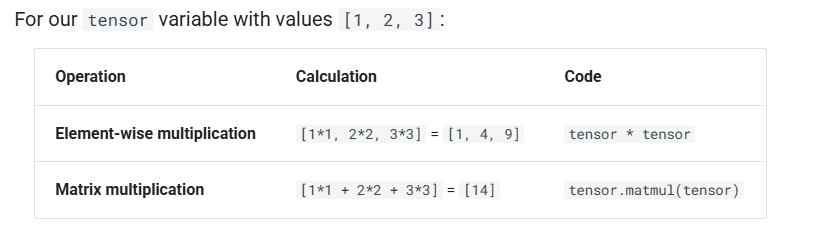

In [54]:
# Elemen-wise matrix multiplication
tensor * tensor

tensor([1, 4, 9])

In [61]:
%%time
# Matrix multiplication
torch.matmul(tensor, tensor)

CPU times: user 704 µs, sys: 0 ns, total: 704 µs
Wall time: 565 µs


tensor(14)

In [59]:
%%time
# Matrix multiplication by hand 
# (avoid doing operations with for loops at all cost, they are computationally expensive)
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
value

CPU times: user 1.09 ms, sys: 1.34 ms, total: 2.43 ms
Wall time: 1.72 ms


tensor(14)

### Linear layer


In [62]:
torch.manual_seed(42)

# This uses matrix multiplication
linear = torch.nn.Linear(
    in_features=2, 
    out_features=6
)
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)
x = tensor_A

output = linear(x)

print(f"Input shape: {x.shape} \n")
print(f"Output:\n {output} \n \n Output shape: {output.shape}")

Input shape: torch.Size([3, 2]) 

Output:
 tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>) 
 
 Output shape: torch.Size([3, 6])


torch.permute(input, dims): https://docs.pytorch.org/docs/stable/generated/torch.permute.html

In [65]:
x_original = torch.rand(size=(224, 224, 3))

x_permuted = x_original.permute(2, 0, 1)

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


### PyTorch tensors & NumPy
The two main methods you'll want to use for NumPy to PyTorch (and back again) are:
- `torch.from_numpy(ndarray)`: NumPy array -> PyTorch tensor -- https://docs.pytorch.org/docs/stable/generated/torch.from_numpy.html
- `torch.Tensor.numpy()`: PyTorch tensor -> NumPy array -- https://docs.pytorch.org/docs/stable/generated/torch.Tensor.numpy.html

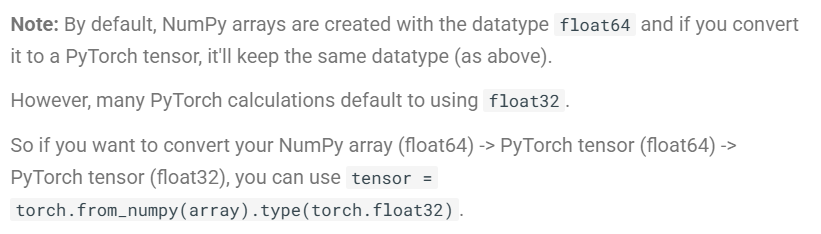

In [ ]:
import torch
import numpy as np

array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array).type(torch.float32)

array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]), tensor([1., 2., 3., 4., 5., 6., 7.]))

In [68]:
# change the array, keep the tensor
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]), tensor([1., 2., 3., 4., 5., 6., 7.]))

In [71]:
# Tensor to NumPy array
tensor = torch.ones(7) # dtype = float32
numpy_array = tensor.numpy()
tensor, numpy_array

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [72]:
# Change the tensor, the array will be change
tensor += 1
tensor, numpy_array

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([2., 2., 2., 2., 2., 2., 2.], dtype=float32))

### Reproducibility (trying to take the random out of random)

In [74]:

import torch

# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(f"Tensor A: \n {random_tensor_A} \n")
print(f"Tensor B: \n {random_tensor_B} \n")
print(f"Does Tensor A equal TensorB ? (anywhere)")

random_tensor_A == random_tensor_B


Tensor A: 
 tensor([[0.2012, 0.1478, 0.3702, 0.1441],
        [0.1284, 0.2582, 0.7732, 0.1060],
        [0.6737, 0.3027, 0.9716, 0.3592]]) 

Tensor B: 
 tensor([[0.6261, 0.9557, 0.0057, 0.6767],
        [0.2114, 0.3975, 0.4007, 0.9157],
        [0.0821, 0.8882, 0.4257, 0.2228]]) 

Does Tensor A equal TensorB ? (anywhere)


tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

torch.manual_seed(): https://docs.pytorch.org/docs/stable/generated/torch.manual_seed.html

In [77]:
import torch
import random

# Set the random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3,4)

# Have to reset the seed every time a new rand() is called
# Without this, tensor_D would be different to tensor_C
torch.random.manual_seed(seed=RANDOM_SEED)
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C: \n {random_tensor_C} \n")
print(f"Tensor D: \n {random_tensor_D} \n")
print(f"Does Tensor C equal Tensor D ? (anywhere)")

random_tensor_C == random_tensor_D

Tensor C: 
 tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]]) 

Tensor D: 
 tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]]) 

Does Tensor C equal Tensor D ? (anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

### Running tensor on GPUs (and making faster computations)


In [78]:
# Check fot GPU
import torch
torch.cuda.is_available()

True

In [79]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [80]:
# Count number of devices
torch.cuda.device_count()

3

put tensors on a specific device by calling `to(device)`

In [81]:
# Create tensor (default on CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

# Move tensor to GPU
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1, 2, 3], device='cuda:0')

In [82]:
tensor_on_gpu.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [83]:
# Instead, copy the tensor back to cpu
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

In [84]:
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')